<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week2/CoachDescribeExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting

In [3]:
 # read in Coaches data and create data frame
Coaches = pd.read_excel("coaches_modify.xlsx")

print(pd.DataFrame.head(Coaches))

Coaches.describe()


              School      Conf              Coach  NCAAFBREV16  MedianConfSal  \
0          Air Force  Mt. West       Troy Calhoun   59577780.0       879288.0   
1              Akron       MAC       Terry Bowden   35331217.0       492413.0   
2            Alabama       SEC         Nick Saban  174307419.0      3929800.0   
3  Appalachian State  Sun Belt  Scott Satterfield   35058621.0       675000.0   
4            Arizona    Pac-12       Kevin Sumlin   90976758.0      2752232.5   

   SchoolPay   TotalPay      Bonus  BonusPaid  PayPlusBonus2016  ...  GSRank  \
0   885000.0   885000.0   247000.0        NaN          885000.0  ...      97   
1   411000.0   412500.0   225000.0    50000.0          462500.0  ...       5   
2  8307000.0  8307000.0  1100000.0   500000.0         8807000.0  ...      84   
3   712500.0   712500.0   295000.0   145000.0          857500.0  ...      13   
4  1600000.0  2000000.0  2025000.0        NaN         2000000.0  ...      60   

   Combo Rank  TrueRank     W   

,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
count,9.900000e+01,1.180000e+02,1.130000e+02,1.130000e+02,9.600000e+01,6.300000e+01,1.140000e+02,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,8.292182e+07,2.301919e+06,2.550025e+06,2.557438e+06,9.175975e+05,2.011909e+05,2.679926e+06,53059.228814,74.644068,67.245763,65.152542,65.666667,62.203390,6.775701,5.981308,1.865069,0.787757,0.827009,1.614579,76.364673
std,4.768607e+07,1.313944e+06,1.906396e+06,1.910683e+06,6.500860e+05,2.640723e+05,1.999123e+06,23699.435546,14.246022,37.649289,38.479127,28.235948,37.878474,3.032243,2.441703,2.396191,6.030251,6.443782,9.220991,7.547450
min,1.613242e+07,4.924130e+05,3.900000e+05,3.900000e+05,5.000000e+04,1.000000e+04,3.900000e+05,9214.000000,0.000000,1.000000,1.000000,10.666667,1.000000,1.000000,1.000000,0.090909,-13.010000,-11.120000,-18.860000,60.550000
25%,3.818882e+07,8.069122e+05,8.500000e+05,8.500000e+05,4.032500e+05,5.000000e+04,8.912500e+05,32062.000000,69.250000,36.250000,33.250000,42.916667,30.000000,4.000000,4.000000,0.500000,-3.460000,-3.370000,-5.700000,70.510000
50%,8.367264e+07,2.458032e+06,2.163000e+06,2.163000e+06,8.075000e+05,9.500000e+04,2.325603e+06,50035.500000,75.000000,66.500000,67.000000,66.333333,59.000000,7.000000,6.000000,1.166667,0.480000,0.290000,2.300000,75.160000
75%,1.146884e+08,3.775000e+06,3.703975e+06,3.703975e+06,1.263750e+06,2.770835e+05,3.946500e+06,66680.000000,83.750000,98.750000,100.000000,85.333333,95.500000,9.000000,8.000000,2.250000,4.835000,5.010000,8.170000,81.130000
max,2.148306e+08,3.929800e+06,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,8.807000e+06,107601.000000,100.000000,130.000000,130.000000,126.333333,129.000000,14.000000,11.000000,14.000000,14.640000,17.620000,25.620000,92.540000


In [4]:
Coaches.describe()


,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
count,9.900000e+01,1.180000e+02,1.130000e+02,1.130000e+02,9.600000e+01,6.300000e+01,1.140000e+02,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,8.292182e+07,2.301919e+06,2.550025e+06,2.557438e+06,9.175975e+05,2.011909e+05,2.679926e+06,53059.228814,74.644068,67.245763,65.152542,65.666667,62.203390,6.775701,5.981308,1.865069,0.787757,0.827009,1.614579,76.364673
std,4.768607e+07,1.313944e+06,1.906396e+06,1.910683e+06,6.500860e+05,2.640723e+05,1.999123e+06,23699.435546,14.246022,37.649289,38.479127,28.235948,37.878474,3.032243,2.441703,2.396191,6.030251,6.443782,9.220991,7.547450
min,1.613242e+07,4.924130e+05,3.900000e+05,3.900000e+05,5.000000e+04,1.000000e+04,3.900000e+05,9214.000000,0.000000,1.000000,1.000000,10.666667,1.000000,1.000000,1.000000,0.090909,-13.010000,-11.120000,-18.860000,60.550000
25%,3.818882e+07,8.069122e+05,8.500000e+05,8.500000e+05,4.032500e+05,5.000000e+04,8.912500e+05,32062.000000,69.250000,36.250000,33.250000,42.916667,30.000000,4.000000,4.000000,0.500000,-3.460000,-3.370000,-5.700000,70.510000
50%,8.367264e+07,2.458032e+06,2.163000e+06,2.163000e+06,8.075000e+05,9.500000e+04,2.325603e+06,50035.500000,75.000000,66.500000,67.000000,66.333333,59.000000,7.000000,6.000000,1.166667,0.480000,0.290000,2.300000,75.160000
75%,1.146884e+08,3.775000e+06,3.703975e+06,3.703975e+06,1.263750e+06,2.770835e+05,3.946500e+06,66680.000000,83.750000,98.750000,100.000000,85.333333,95.500000,9.000000,8.000000,2.250000,4.835000,5.010000,8.170000,81.130000
max,2.148306e+08,3.929800e+06,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,8.807000e+06,107601.000000,100.000000,130.000000,130.000000,126.333333,129.000000,14.000000,11.000000,14.000000,14.640000,17.620000,25.620000,92.540000


In [5]:
# System Information
import platform

print('Python is ' + platform.python_version())

pd.show_versions(as_json=False)

Python is 3.9.6

INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.9.6.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 22.4.0
Version          : Darwin Kernel Version 22.4.0: Mon Mar  6 20:59:28 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T6000
machine          : arm64
processor        : arm
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.UTF-8

pandas           : 1.5.3
numpy            : 1.24.2
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : 67.6.1
pip              : 23.0.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.11.0
pandas_datareader: None
bs4        

/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [6]:
Coaches

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,NaN,885000.0,...,97,64.666667,67,10.0,3.0,3.333333,4.96,-0.87,4.09,78.16
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,5,10.666667,129,5.0,7.0,0.714286,-0.40,-6.12,-6.52,72.64
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,84,111.333333,5,14.0,1.0,14.000000,8.01,17.62,25.62,90.38
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,13,19.666667,122,10.0,3.0,3.333333,-0.86,9.68,8.83,70.76
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,NaN,2000000.0,...,60,65.666667,62,3.0,9.0,0.333333,1.01,-5.64,-4.63,74.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Washington State,Pac-12,Mike Leach,64294520.0,2752232.5,3500000.0,3500000.0,725000.0,75000.0,3575000.0,...,121,83.000000,37,8.0,5.0,1.600000,5.70,3.33,9.03,84.22
114,West Virginia,Big 12,Dana Holgorsen,110565870.0,3775000.0,3605000.0,3617500.0,1000000.0,90000.0,3707500.0,...,20,65.666667,62,10.0,3.0,3.333333,4.01,5.56,9.57,78.75
115,Western Michigan,MAC,Tim Lester,38516531.0,492413.0,800000.0,800000.0,346500.0,39250.0,839250.0,...,60,39.333333,100,13.0,1.0,13.000000,7.61,4.42,12.03,86.24
116,Wisconsin,Big Ten,Paul Chryst,143420668.0,3775000.0,3750000.0,3750000.0,NaN,290000.0,4040000.0,...,40,83.666667,32,11.0,3.0,3.666667,2.13,13.17,15.30,78.74


In [8]:
import numpy as np

# Explore the data
correlations = Coaches.corr()

# Zero out the lower triangle of the matrix
mask = np.triu(np.ones_like(correlations, dtype=bool))
correlations = correlations.mask(mask)

correlations

/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_39973/3600546581.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = Coaches.corr()


,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
NCAAFBREV16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedianConfSal,0.852733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolPay,0.895271,0.785768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalPay,0.894602,0.784729,0.999669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus,0.515900,0.543263,0.417590,0.421149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BonusPaid,0.354544,0.280776,0.423007,0.424036,0.494250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PayPlusBonus2016,0.879956,0.769785,0.994390,0.994807,0.442279,0.518762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StadSize,0.883808,0.686107,0.800937,0.801060,0.433950,0.333070,0.788671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Graduation Rate (GSR),0.162753,0.089217,0.132029,0.130150,0.136302,0.197535,0.141313,0.135629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat Rank,0.858824,0.718359,0.767220,0.767891,0.502479,0.341514,0.760737,0.973022,0.134930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

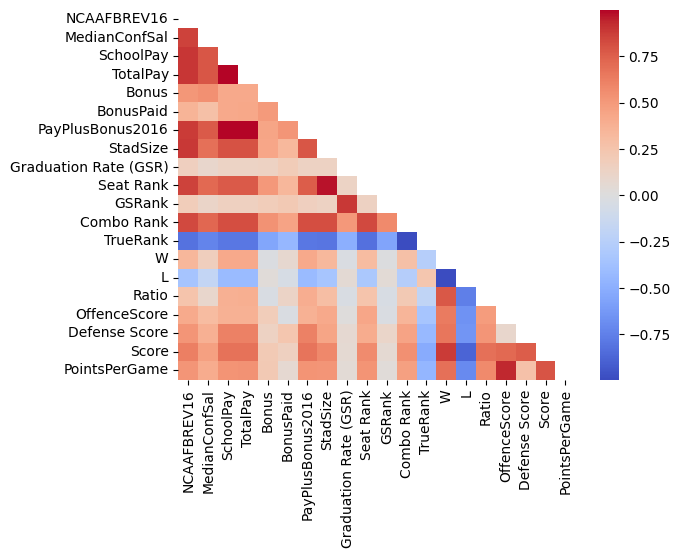

In [9]:
import seaborn as sns

sns.heatmap(correlations, cmap='coolwarm')